In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [4]:
iris = pd.read_csv("Iris.csv")

In [5]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa
...,...,...,...,...,...,...
145,146,6.70,3.00,5.20,2.30,Iris-virginica
146,147,6.30,2.50,5.00,1.90,Iris-virginica
147,148,6.50,3.00,5.20,2.00,Iris-virginica
148,149,6.20,3.40,5.40,2.30,Iris-virginica


In [6]:
iris_data = iris.drop(['Id'], axis=1)

In [7]:
# Descriptive statistics 
df_summary=iris_data.describe()
df_summary

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


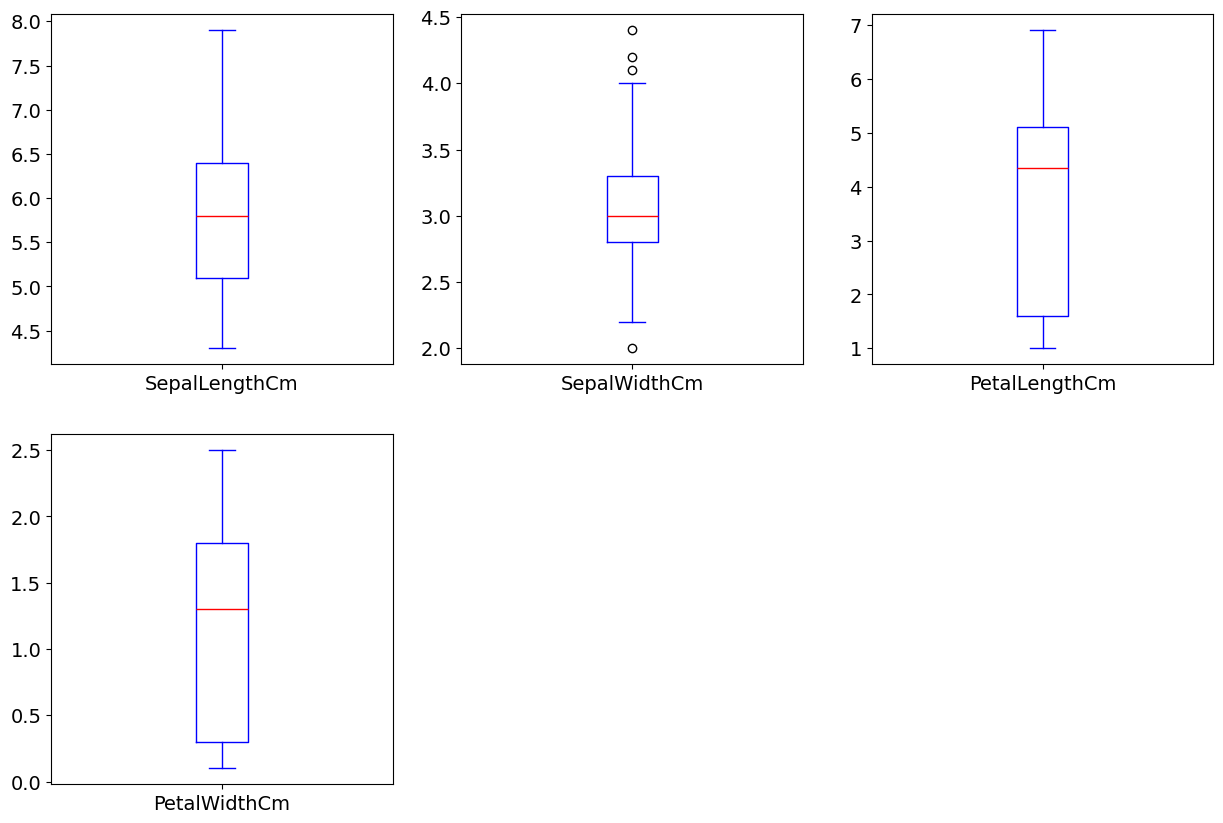

From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.
It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.


In [8]:
boxplot=iris_data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))
plt.show()
print('From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.')
print('It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.')

In [9]:
# Correlation Matrix for Iris_dataset
iris_data.corr(numeric_only = True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.00,-0.11,0.87,0.82
SepalWidthCm,-0.11,1.00,-0.42,-0.36
PetalLengthCm,0.87,-0.42,1.00,0.96
PetalWidthCm,0.82,-0.36,0.96,1.00


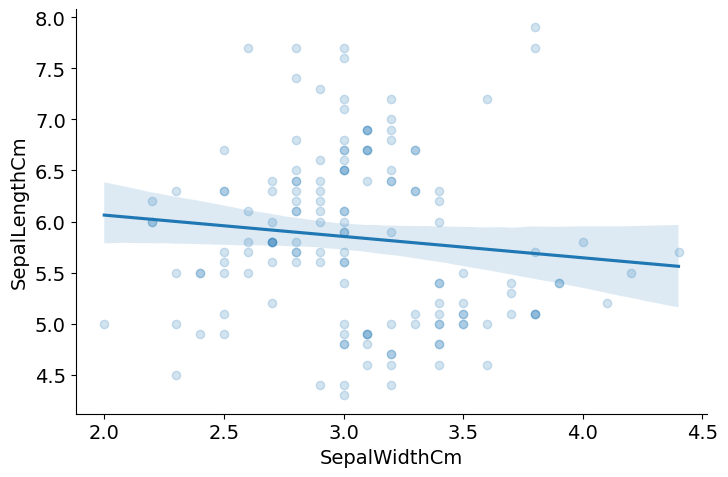

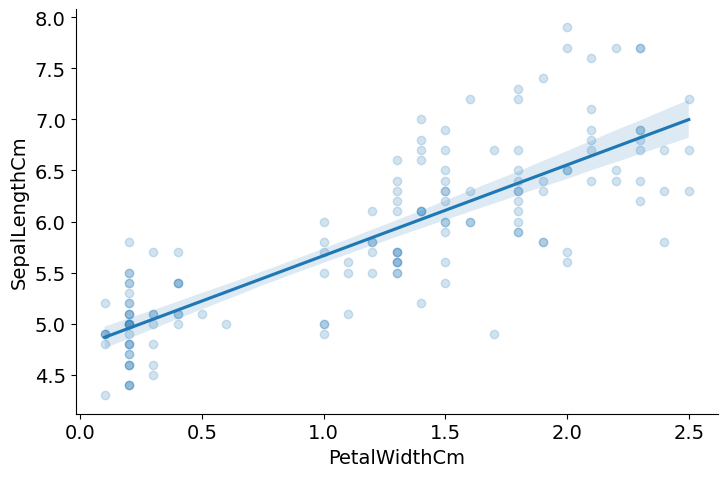

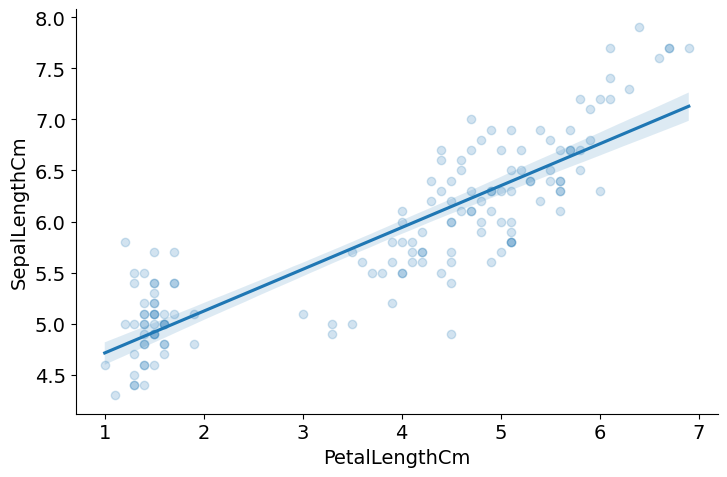

In [10]:
a=sns.lmplot(x='SepalWidthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})
b=sns.lmplot(x='PetalWidthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})
c=sns.lmplot(x='PetalLengthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})  

plt.show()

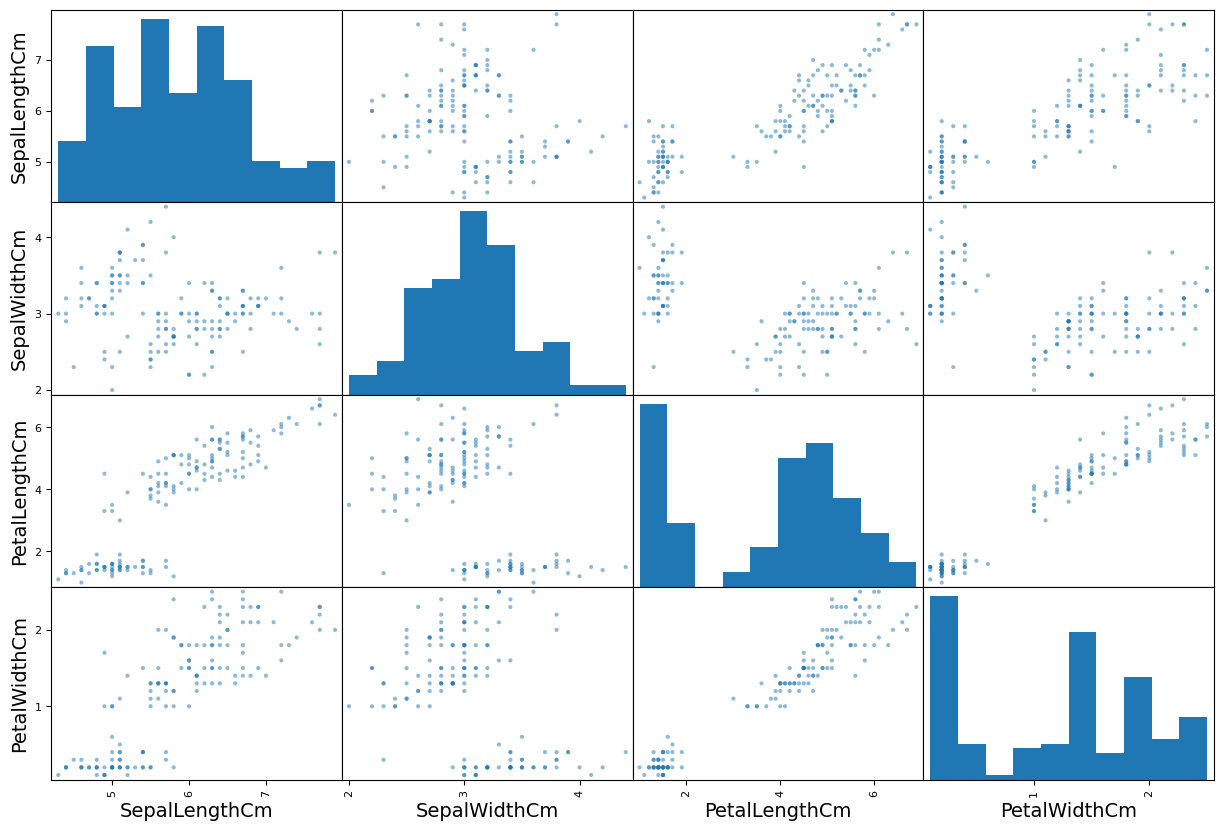

In [12]:
#Combine scatterplot to explore relation b/w sepallength, sepalwidth, petalwidth, petallength

scatter=pd.plotting.scatter_matrix(iris_data,figsize=(15,10))

plt.show()

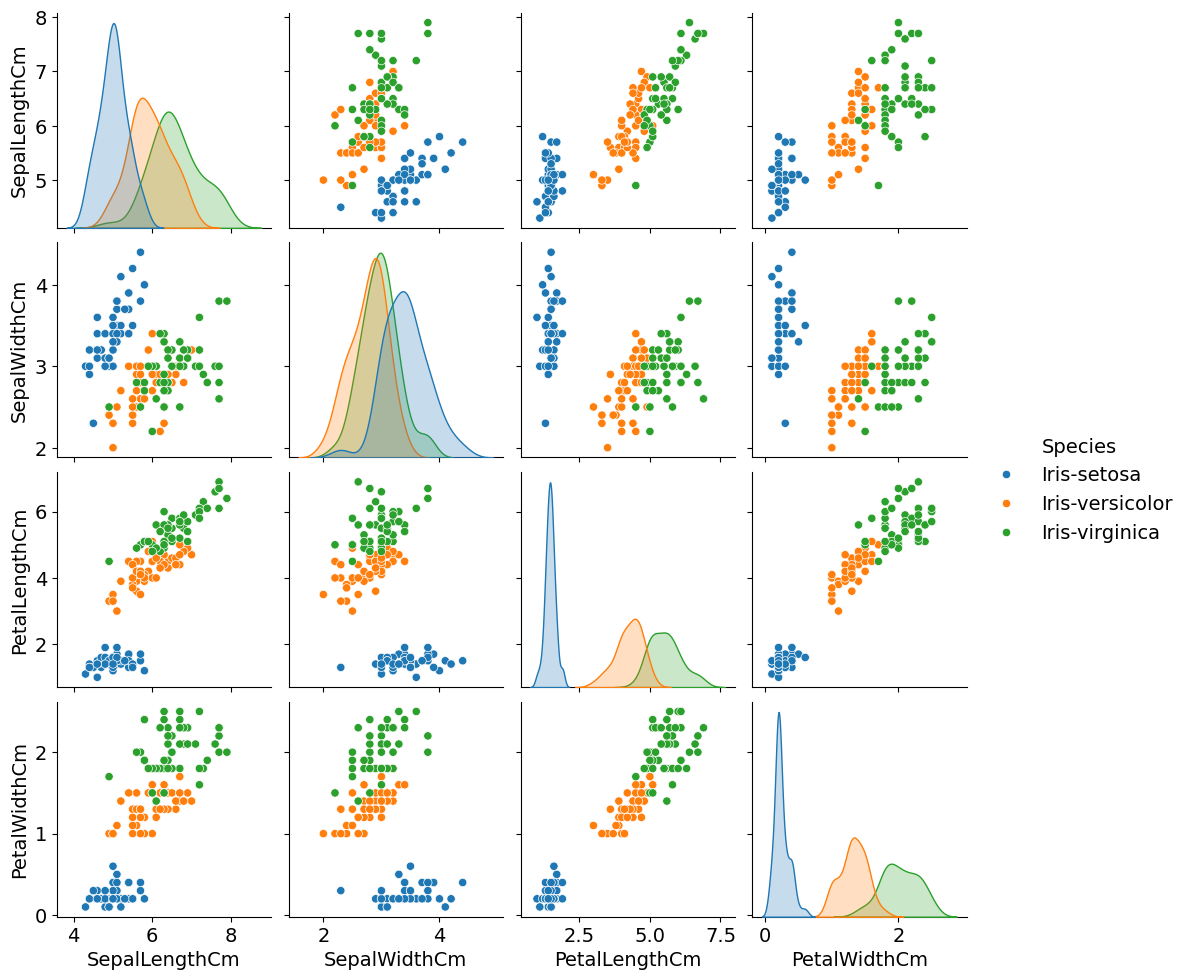

In [13]:
#Scatterplot EDA b/w sepallength, sepalwidth, petalwidth, petallength and how species are reacting to it.

scatterplot=sns.pairplot(iris_data,hue="Species")

plt.show()

In [15]:
#Checking the relationship between Sepal width and Sepal length
input_cols = ['SepalWidthCm']
output_variable = ['SepalLengthCm']
X = iris_data[input_cols]
Y = iris_data[output_variable]

In [18]:
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')
print('Sepal.length = {-0.2088*Sepal.Width + 6.481')
print('\n')
print('Holding constant fixed, a 1 centimeter increase in sepalwidth lead to a decrease in Sepalength by 0.208centimeter')

[6.48122321]
[[-0.20887029]]


Sepal.length = {-0.2088*Sepal.Width + 6.481


Holding constant fixed, a 1 centimeter increase in sepalwidth lead to a decrease in Sepalength by 0.208centimeter


In [19]:
#Checking the relationship between Petal length and Sepal length
input_cols = ['PetalLengthCm']
output_variable = ['SepalLengthCm']
X = iris_data[input_cols]
Y = iris_data[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')
print('Sepal.length = 0.409*Petal.length + 4.305')
print('\n')
print('Holding constant fixed, a 1 centimeter increase in petallength lead to a increase in Sepalength by 0.409 centimeter')

[4.30556546]
[[0.4091259]]


Sepal.length = 0.409*Petal.length + 4.305


Holding constant fixed, a 1 centimeter increase in petallength lead to a increase in Sepalength by 0.409 centimeter


In [ ]:
training_prediction = log_reg.predict(X_train)
training_prediction

In [ ]:
test_prediction = log_reg.predict(X_test)
test_prediction

In [ ]:
print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

In [ ]:
print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test, test_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_test, test_prediction))